In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [3]:
model="deepseek-r1-distill-llama-70b"

gemini_model = "gemini-1.5-flash"

In [4]:
from langchain_groq import ChatGroq

llm=ChatGroq(model_name=model)

llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.08214538, 'prompt_time': 5.5279e-05, 'queue_time': 0.053631501000000005, 'total_time': 0.082200659}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--316bedc8-5c97-47eb-8b6e-61f68ae55096-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm1 = ChatGoogleGenerativeAI(model=gemini_model)

llm1.invoke("hi")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run--67aa2747-b24f-4df4-a9e4-5d13de3479e5-0', usage_metadata={'input_tokens': 1, 'output_tokens': 11, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [6]:
from langchain.tools import tool

### These are Custom tools - Production ready doc string

In [7]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

### Using Inbuilt tools

In [8]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

In [9]:
search.invoke("Who are the WTC Champions?")

"Explore the complete history, schedule, results, and future fixtures of the ICC World Test Championship (WTC) from 2019 to 2027. Get details on WTC winners, finals, team performances, and India's campaign in upcoming cycles. WTC Winners List: Check out the latest list of World Test Championship Winners List from 2019 to 2025, including runners-up, venue, player of the series, man of the match, most WTC wins & more on ... Another cycle of the World Test Championship (WTC) has concluded, this time with the underdogs South Africa as the champions. The Proteas stunned the mighty Australians with a come-from-behind victory, to end a 27-year-long drought of a senior men's ICC trophy for the Rainbow Nation. It was a ... South Africa claimed its first International Cricket Council (ICC) trophy in 27 years after beating Australia by five wickets in the World Test Championship (WTC) final at Lord's on Saturday. The 2025 ICC WTC Final between South Africa and Australia took place at Lord's Crick

In [10]:
tools = [multiply, add, divide, search]

In [11]:
llm_with_tools = llm.bind_tools(tools)

In [12]:
response = llm_with_tools.invoke("hi")

response.content

'Hello! How can I assist you today?'

In [13]:
response.tool_calls

[]

In [14]:
response = llm_with_tools.invoke("What is 2+2?")

response.content

''

In [15]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '88aakk6bx',
  'type': 'tool_call'}]

In [16]:
response = llm_with_tools.invoke("What is 10/2?")
response.content

''

In [17]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'r4dyc6j0x',
  'type': 'tool_call'}]

In [18]:
response = llm_with_tools.invoke("What is the current age of Mukesh Ambani?")

response.content

''

In [19]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'Mukesh Ambani age'},
  'id': 'qt1tnghf6',
  'type': 'tool_call'}]

In [20]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [21]:
system_prompt = "You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

In [22]:
user_query = ["Tell me what is 2+2?"]

In [23]:
[system_prompt] + user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'Tell me what is 2+2?']

In [24]:
def function_1(state:MessagesState):
    
    user_question = state["messages"]
    input_question = [system_prompt] + user_question
    response = llm_with_tools.invoke(input_question)

    return {
        "messages": [response]
    }



In [25]:
builder=StateGraph(MessagesState)

In [26]:
builder.add_node("llm_decision_step",function_1)

In [27]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001D0B8D25940>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001D0B8AF1080>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001D0B8D25580>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [28]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [29]:
builder.add_edge(START, "llm_decision_step")

In [30]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

In [31]:
builder.add_edge("tools","llm_decision_step")

In [32]:
react_graph = builder.compile()

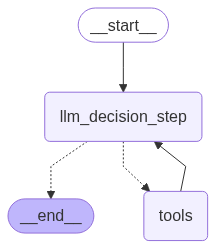

In [33]:
from IPython.display import Image, display 
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [34]:
message = [HumanMessage(content="What is 2 times od narendramodi's age?")]

In [35]:
react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content="What is 2 times od narendramodi's age?", additional_kwargs={}, response_metadata={}, id='3b732e01-3cb7-4665-80a8-ff4f9e0787c5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '56kdnff27', 'function': {'arguments': '{"query":"Narendra Modi age 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 167, 'prompt_tokens': 423, 'total_tokens': 590, 'completion_time': 0.646274064, 'prompt_time': 0.034914971, 'queue_time': 0.05392403899999999, 'total_time': 0.681189035}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1e8d2f4e-17af-4c09-9bab-078975c7ec4d-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age 2023'}, 'id': '56kdnff27', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 167, 'total_tokens': 590}),
  ToolMessage(co

In [36]:
message = [HumanMessage(content="How much is Elon Musk net worth, divide it by 2?")]

In [37]:
react_graph.invoke({"messages": message})

{'messages': [HumanMessage(content='How much is Elon Musk net worth, divide it by 2?', additional_kwargs={}, response_metadata={}, id='4ffe7935-5e52-45db-86c4-b346249e8d1d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '228k8pt36', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 192, 'prompt_tokens': 424, 'total_tokens': 616, 'completion_time': 0.698181818, 'prompt_time': 0.038037085, 'queue_time': 0.054721026000000006, 'total_time': 0.736218903}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f4bd8289-eece-4e0d-a04a-7ba411479a31-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': '228k8pt36', 'type': 'tool_call'}], usage_metadata={'input_tokens': 424, 'output_tokens': 192, 'total_tokens': 616}),
 

In [38]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it with 10.")]

response = react_graph.invoke({"messages": message})

response["messages"][-1].content

'The speed of light in meters per second is **299,792,458 m/s**. When multiplied by 10, the result is:\n\n**299,792,458 × 10 = 2,997,924,580**\n\nSo, the final result is **2,997,924,580**.'

In [39]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it with 10.
================================== Ai Message ==================================
Tool Calls:
  multiply (dyw2qs353)
 Call ID: dyw2qs353
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================
Tool Calls:
  multiply (3pnyt1a0z)
 Call ID: 3pnyt1a0z
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
================================== Ai Message ==================================
Tool Calls:
  multiply (zvyj6b2h8)
 Call ID: zvyj6b2h8
  Args:
    a: 299792458
    b: 10
================================= Tool Message =================================
Name: multiply

2997924580
======================

In [40]:
from langchain.tools import tool
import yfinance as yf

In [41]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [42]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $199.20.'

In [43]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $319.11.'

In [44]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x000001D0B8D25940>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x000001D0B8AF1080>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x000001D0B8D25580>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [45]:
tools = [add, multiply, divide, search,get_stock_price]

In [46]:
llm_with_tools=llm.bind_tools(tools)

In [47]:
response=llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [48]:
response.content

''

In [49]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'kbjp20fgk',
  'type': 'tool_call'}]

In [50]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [51]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

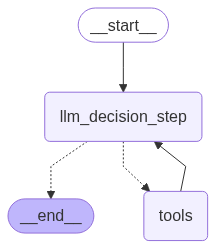

In [52]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [53]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [54]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (jdtcrsm1a)
 Call ID: jdtcrsm1a
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $199.20.
================================== Ai Message ==================================


In [55]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages})

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [56]:
for m in messages['messages']:
    m.pretty_print()

TypeError: list indices must be integers or slices, not str

Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    